# Modélisation et Traitement d'Images (MTI)
Mathieu Chanavat - Maxime De Beaucorps - Maxime Lanvin - Hugo Vanderperre

## Imports

In [13]:
import bm3d
from bm3d_lenotre import BM3D
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

IndentationError: expected an indented block (bm3d_lenotre.py, line 178)

## Import Images

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


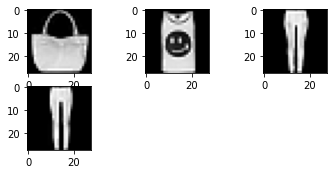

In [11]:
from keras.datasets import fashion_mnist
# get training and testing vectors 
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainy.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testy.shape))

#plotting 
for i in range(4):  
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i+100], cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
params = {
    "N1_th": 4,
    "N1_wie": 4,
    "Ns": 2,
    "N_step": 4,
    "sigma": 2,
    "lambda_3d": 1,
    "lambda_2d": 1,
    "tau_ht_match": 1,
    "tau_wie_match": 1
}

denoiser = BM3D(np.zeros((16, 16)), **params)
img_denoised = denoiser.denoise()


NameError: name 'BM3D' is not defined